머스트잇 상품 정보데이터 샘플 컬럼

idx : 인덱스	  
sitename	: 사이트이름  
seller	: 판매자  
url	: URL  
name	:상품이름  
brand	: 브랜드  
price	: 가격  
shipping_info :국내배송	  
shipping_charge	: 유/무료  
catname	: 카테고리분류  
inserted_ts : 시간  

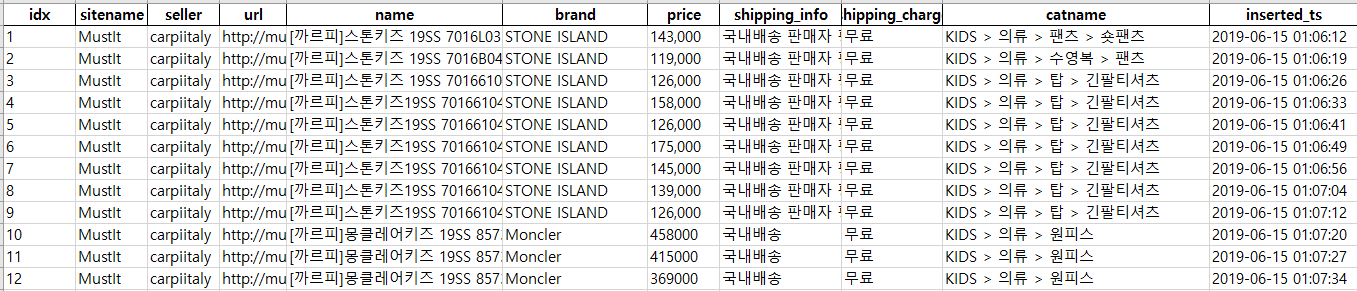

In [1]:
#크롬 드라이버 자동생성
from selenium import webdriver
import chromedriver_autoinstaller

chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]  #크롬드라이버 버전 확인
print("chrome_ver : " ,chrome_ver)
try:
    driver = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')

#driver.implicitly_wait(10)

chrome_ver :  101


C:\Users\USER\AppData\Local\Temp/ipykernel_3100/65492130.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')
C:\Users\USER\AppData\Local\Temp/ipykernel_3100/65492130.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')


# 1. 상품 url 가져오기

In [2]:
import requests
from bs4 import BeautifulSoup
import re
from datetime import date, timedelta
import json
import time

**키즈 - 의류**  
https://mustit.co.kr/product/search?checkHeadCate[]=K&checkCategory[]=20&click=header  
여성 - 의류  
https://mustit.co.kr/product/search?checkHeadCate[]=W&checkCategory[]=15&click=header  
남성 - 의류  
https://mustit.co.kr/product/search?checkHeadCate[]=M&checkCategory[]=15&click=header  
라이프 - 테크  
https://mustit.co.kr/product/search?checkHeadCate[]=L&checkCategory[]=24&click=header  

In [3]:
url = "https://mustit.co.kr/product/search?checkHeadCate[]=K&checkCategory[]=20&click=header#sort=popular&per_page=1"
# headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
# res = requests.get(url,headers = headers)

In [4]:
#동적웹페이지 크롤링 방법
#selenium으로 page_source만 가져오기
driver.get(url)
time.sleep(1)
# print(driver.title)
# print(driver.current_url)

In [6]:
soup = BeautifulSoup(driver.page_source, 'lxml')
#soup

In [7]:
list = soup.select("div.mi-col-3 > div.mi-card-product-2")
len(list) #1page 당 40개씩

list[0].select('a')[0]["href"]
list[0].select('span.product-desc-box > p')[0].text
list[0].select('h5>span')[0].text

'KENZO'

In [8]:
import pandas as pd

total = []
for li in list:
    url = "https://mustit.co.kr"+li.select('a')[0]["href"]
    name = li.select('span.product-desc-box > p')[0].text
    brand = li.select('h5>span')[0].text

# 2.상품정보 가져오기

In [9]:
url2 = "https://mustit.co.kr/product/product_detail/19406833"

In [10]:
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
res2 = requests.get(url2,headers = headers)
soup2 = BeautifulSoup(res2.text,'lxml')
#soup2

In [11]:
baesongjb = soup2.select("#productDetailInfo > div:nth-child(8) > div:nth-child(2) > div.no-set-padding.light-arrow.mi-border-del.no-set-arrow > div > div:nth-child(2) > span")[0].text
baelist = baesongjb.split("/")
print(baelist[0],baelist[1])


무료
																																										  국내배송													


In [12]:
soup2.select("#productDetailInfo > div:nth-child(8) > div:nth-child(3) > div.mi-accordion-title.no-set-padding.light-arrow.mi-border-del.no-set-arrow.mi-pointer.mi-group-b15 > div > div:nth-child(2) > span")[0].text

's-project'

In [13]:
soup2.select("#productDetailInfo > div.mi-box-p20.product_price_area > div:nth-child(1) > div.product_price_area__cell_td > div > span > span.price")[0].text

'240,000'

In [14]:
catname = soup2.select("#product_detail > div.mi-relative > div.mi-bread-crumb.mi-group-b40")[0].text.replace('\n','>')[1:-1]
catname

'KIDS>의류>코트/자켓>다운'

In [15]:
baesongjb = soup2.select("#productDetailInfo > div:nth-child(8) > div:nth-child(2) > div.no-set-padding.light-arrow.mi-border-del.no-set-arrow > div > div:nth-child(2) > span")[0].text
baelist = baesongjb.split("/")

shipping_charge= baelist[0].strip()
shipping_info = baelist[1].strip()
seller = soup2.select("#productDetailInfo > div:nth-child(8) > div:nth-child(3) > div.mi-accordion-title.no-set-padding.light-arrow.mi-border-del.no-set-arrow.mi-pointer.mi-group-b15 > div > div:nth-child(2) > span")[0].text
price = soup2.select("#productDetailInfo > div.mi-box-p20.product_price_area > div:nth-child(1) > div.product_price_area__cell_td > div > span > span.price")[0].text
catname = soup2.select("#product_detail > div.mi-relative > div.mi-bread-crumb.mi-group-b40")[0].text.replace('\n','>')[1:-1]
# name :상품이름
# brand : 브랜드
# price : 가격
# shipping_info :국내배송
# shipping_charge : 유/무료
# catname : 카테고리분류
# inserted_ts : 시간
shipping_charge.strip()

'무료'

In [16]:
import datetime

now = datetime.datetime.now()
print(now)

2022-05-04 15:24:44.779758


In [17]:
total = []
for li in list:
    url = "https://mustit.co.kr"+li.select('a')[0]["href"]
    name = li.select('span.product-desc-box > p')[0].text
    brand = li.select('h5>span')[0].text
    #print(brand,name,url)
#     total.append({
#         "url" : url,
#         "name" : name,
#         "brand" : brand,
#     })    
    url2 = url
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
    res2 = requests.get(url2,headers = headers)
    soup2 = BeautifulSoup(res2.text,'lxml')
    
    baesongjb = soup2.select("#productDetailInfo > div:nth-child(8) > div:nth-child(2) > div.no-set-padding.light-arrow.mi-border-del.no-set-arrow > div > div:nth-child(2) > span")[0].text
    baelist = baesongjb.split("/")
    shipping_charge = baelist[0].strip()
    shipping_info = baelist[1].strip()
    seller = soup2.select("#productDetailInfo > div:nth-child(8) > div:nth-child(3) > div.mi-accordion-title.no-set-padding.light-arrow.mi-border-del.no-set-arrow.mi-pointer.mi-group-b15 > div > div:nth-child(2) > span")[0].text
    price = soup2.select("#productDetailInfo > div.mi-box-p20.product_price_area > div:nth-child(1) > div.product_price_area__cell_td > div > span > span.price")[0].text
    catname = soup2.select("#product_detail > div.mi-relative > div.mi-bread-crumb.mi-group-b40")[0].text.replace('\n','>')[1:-1]
    
    total.append({
        "sitename" : "MustIt",
        "seller" : seller,        
        "url" : url,
        "name" : name,
        "brand" : brand,
        "price" : price,
        "shipping_info" : shipping_info,
        "shipping_charge" : shipping_charge,
        "catname" : catname,
        "inserted_ts":datetime.datetime.now()
    })

In [18]:
df= pd.DataFrame(total)
df

,sitename,seller,url,name,brand,price,shipping_info,shipping_charge,catname,inserted_ts
0,MustIt,s-project,https://mustit.co.kr/product/product_detail/26...,21FW KENZO 겐조 키즈 타이거 맨투맨 K25166,KENZO,"100,000",국내배송,무료,KIDS>의류>탑>스웨터,2022-05-04 15:24:45.528620
1,MustIt,dmont,https://mustit.co.kr/product/product_detail/37...,디몬트 22 S/S 스톤 키즈 와펜 패치 라운드넥 맨투맨(13종택) 76166134...,STONE ISLAND,"245,000",국내배송,무료,KIDS>의류>탑>긴팔티셔츠,2022-05-04 15:24:46.728982
2,MustIt,HasLux,https://mustit.co.kr/product/product_detail/27...,[국내당일출고]폴로 랄프로렌 걸즈 여성 가디건 블랙 (14세이상성인착용),Ralph Lauren,"110,000",국내배송,"4,000원",KIDS>의류>탑>스웨터,2022-05-04 15:24:47.309325
3,MustIt,pmultishop6,https://mustit.co.kr/product/product_detail/40...,22SS 스톤아일랜드 키즈 6/12A 와펜패치 가디건 7616511A1(BK),STONE ISLAND,"215,000",국내배송,무료,KIDS>의류>탑>스웨터,2022-05-04 15:24:48.067810
4,MustIt,s-project,https://mustit.co.kr/product/product_detail/26...,21FW JELLYMALLOW 젤리멜로 아우어플래닛 지퍼재킷 JM2120327,JELLY MALLOW,"124,000",국내배송,무료,KIDS>의류>코트/자켓>자켓,2022-05-04 15:24:49.135755
5,MustIt,s-project,https://mustit.co.kr/product/product_detail/36...,22SS JELLYMALLOW 젤리멜로 레오 데님 워크 자켓 JM2210319,JELLY MALLOW,"124,000",국내배송,무료,KIDS>의류>코트/자켓>자켓,2022-05-04 15:24:50.390090
6,MustIt,s-project,https://mustit.co.kr/product/product_detail/37...,22SS JELLYMALLOW 젤리멜로 롤러 데님 미디 숏 팬츠 JM2210424,JELLY MALLOW,"62,000",국내배송,무료,KIDS>의류>팬츠>데님,2022-05-04 15:24:51.920765
7,MustIt,yeinmarket,https://mustit.co.kr/product/product_detail/23...,폴로 랄프로렌 꽈배기 가디건 걸즈 케이블 니트 가디건 (14세 이상 성인 착용),Ralph Lauren,"56,000",해외직배송,"1개당 30,000원",KIDS>의류>탑>스웨터,2022-05-04 15:24:52.892304
8,MustIt,pmultishop6,https://mustit.co.kr/product/product_detail/39...,22SS 스톤아일랜드 키즈 6/12A 로고 패치 티셔츠 761620147(BK),STONE ISLAND,"98,000",국내배송,무료,KIDS>의류>탑>반팔티셔츠,2022-05-04 15:24:53.521922
9,MustIt,s-project,https://mustit.co.kr/product/product_detail/26...,21FW JELLYMALLOW 젤리멜로 토토 라운지팬츠 JM2120412,JELLY MALLOW,"69,000",국내배송,무료,KIDS>의류>팬츠>클래식팬츠,2022-05-04 15:24:54.166492


In [19]:
#날짜 추출
from datetime import date, timedelta

today = date.today()
yesterday = date.today() - timedelta(1)
 
# print(today.strftime('%Y%m%d')) #오늘
# print(yesterday.strftime('%Y%m%d')) #어제

today = today.strftime('%Y%m%d')
yesterday = yesterday.strftime('%Y%m%d')

df.to_csv("머스트잇상품정보데이터_Sample_"+yesterday+".csv",index=False,encoding='utf-8-sig')

In [20]:
#셀레니움 종료.
driver.quit()